In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from stoneforge.preprocessing import las_import, depth_zones
from stoneforge.pseudo_wells import lithology_generator, monte_carlo_simulations, pseudo_tools
from stoneforge.vis import plito

In [2]:
data_22,units_22 = las_import("D://appy_projetos//wells//7-MP-22-BA.las")
data_22 = data_22[['DEPTH','GR','RHOB','NPHI','DT','Lith_new']].dropna()
data_33,units_33 = las_import("D://appy_projetos//wells//7-MP-33D-BA.las")
data_33 = data_33[['DEPTH','GR','RHOB','NPHI','DT','Lith_new']].dropna()
data_38,units_38 = las_import("D://appy_projetos//wells//7-MP-38D-BA.las")
data_38 = data_38[['DEPTH','GR','RHOB','NPHI','DT','Lith_new']].dropna()
data_49,units_49 = las_import("D://appy_projetos//wells//7-MP-49D-BA.las")
data_49 = data_49[['DEPTH','GR','RHOZ','NPHI','DT','Lith_new']].dropna()
data_50,units_50 = las_import("D://appy_projetos//wells//7-MP-50D-BA.las")
data_50 = data_50[['DEPTH','GR','RHOB','NPHI','DT','Lith_new']].dropna()
data_56,units_56 = las_import("D://appy_projetos//wells//7-MP-56D-BA.las")
data_56 = data_56[['DEPTH','GR','RHOB','NPHI','DT','Lith_new']].dropna()
data_49 = data_49.rename(columns={"RHOZ": "RHOB"})

In [3]:
data_49

,DEPTH,GR,RHOB,NPHI,DT,Lith_new
1889,305.7144,68.1679,2.3941,-0.0251,116.5644,49.0
1890,305.8668,72.7200,2.3941,-0.0255,121.7132,49.0
1891,306.0192,70.1443,2.3941,-0.0260,128.9175,49.0
1892,306.1716,66.5558,2.3941,-0.0264,141.3369,49.0
1893,306.3240,63.7755,2.3941,-0.0269,146.9186,49.0
...,...,...,...,...,...,...
18982,2910.6876,42.6808,2.5013,0.0450,67.9459,49.0
18983,2910.8400,49.2733,2.5210,0.0494,67.9459,49.0
18984,2910.9924,52.4361,2.5425,0.0477,67.9459,49.0
18985,2911.1448,60.9180,2.5754,0.0567,67.9459,49.0


In [4]:
colors = {
    57:"green",
    49:"yellow",
    54:"maroon",
    25:"grey"
}

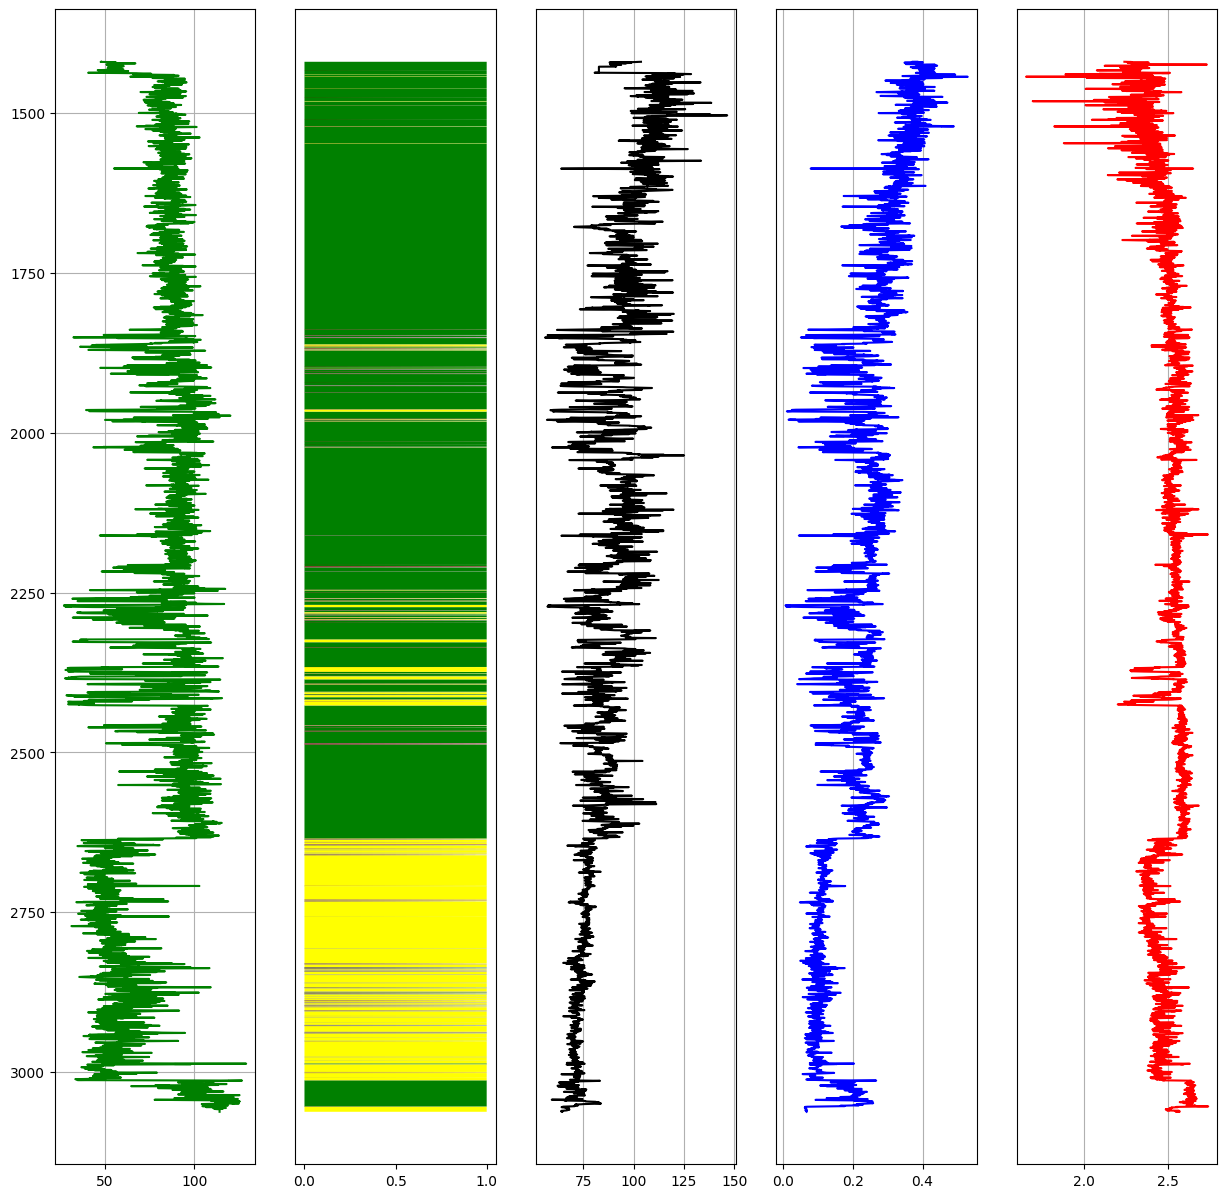

In [5]:
def view_caruacu(df):

    colors = {
    57:"green",
    49:"yellow",
    54:"maroon",
    25:"grey"
    }

    plt.figure(figsize=(15,15))

    lito = np.array(df["Lith_new"])
    dept = np.array(df['DEPTH'])
    gr = np.array(df['GR'])
    dt = np.array(df['DT'])
    nphi = np.array(df['NPHI'])
    rhob = np.array(df['RHOB'])

    plt.subplot(1,5,1)
    plt.gca().invert_yaxis()
    plt.plot(gr,dept,'g')
    plt.grid()
    
    plt.subplot(1,5,2)
    plt.gca().invert_yaxis()
    plito(lito,dept,colors)
    plt.yticks([])

    plt.subplot(1,5,3)
    plt.gca().invert_yaxis()
    plt.plot(dt,dept,'k')
    plt.yticks([])
    plt.grid()

    plt.subplot(1,5,4)
    plt.gca().invert_yaxis()
    plt.plot(nphi,dept,'b')
    plt.yticks([])
    plt.grid()

    plt.subplot(1,5,5)
    plt.gca().invert_yaxis()
    plt.plot(rhob,dept,'r')
    plt.yticks([])
    plt.grid()

view_caruacu(data_22)
# 1750, 2600

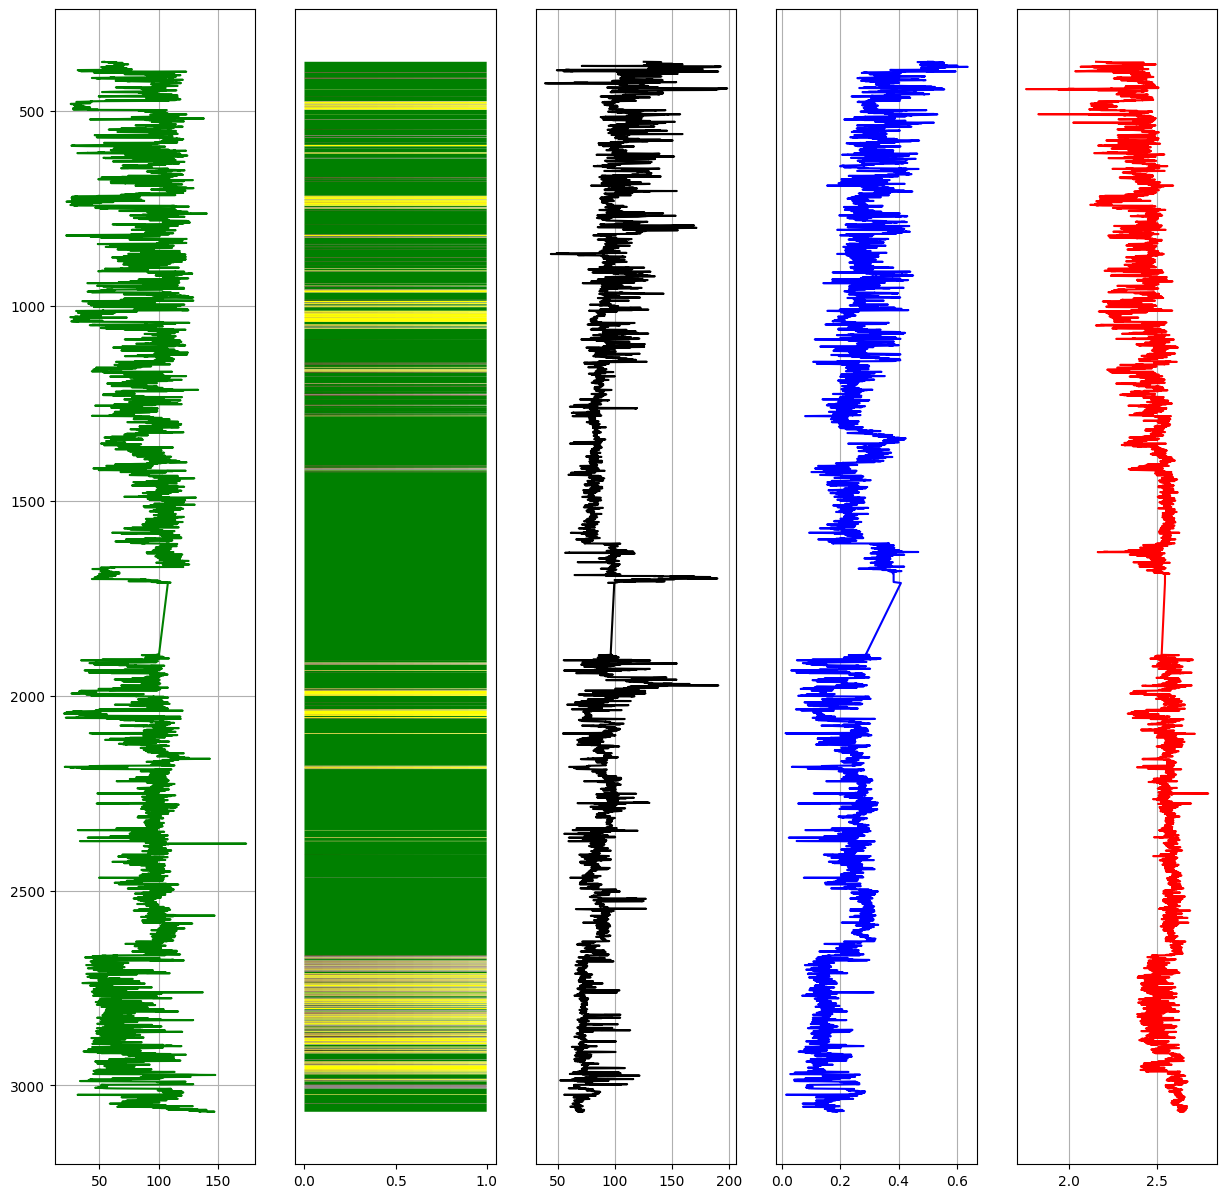

In [6]:
view_caruacu(data_33)
# 1100, 2600

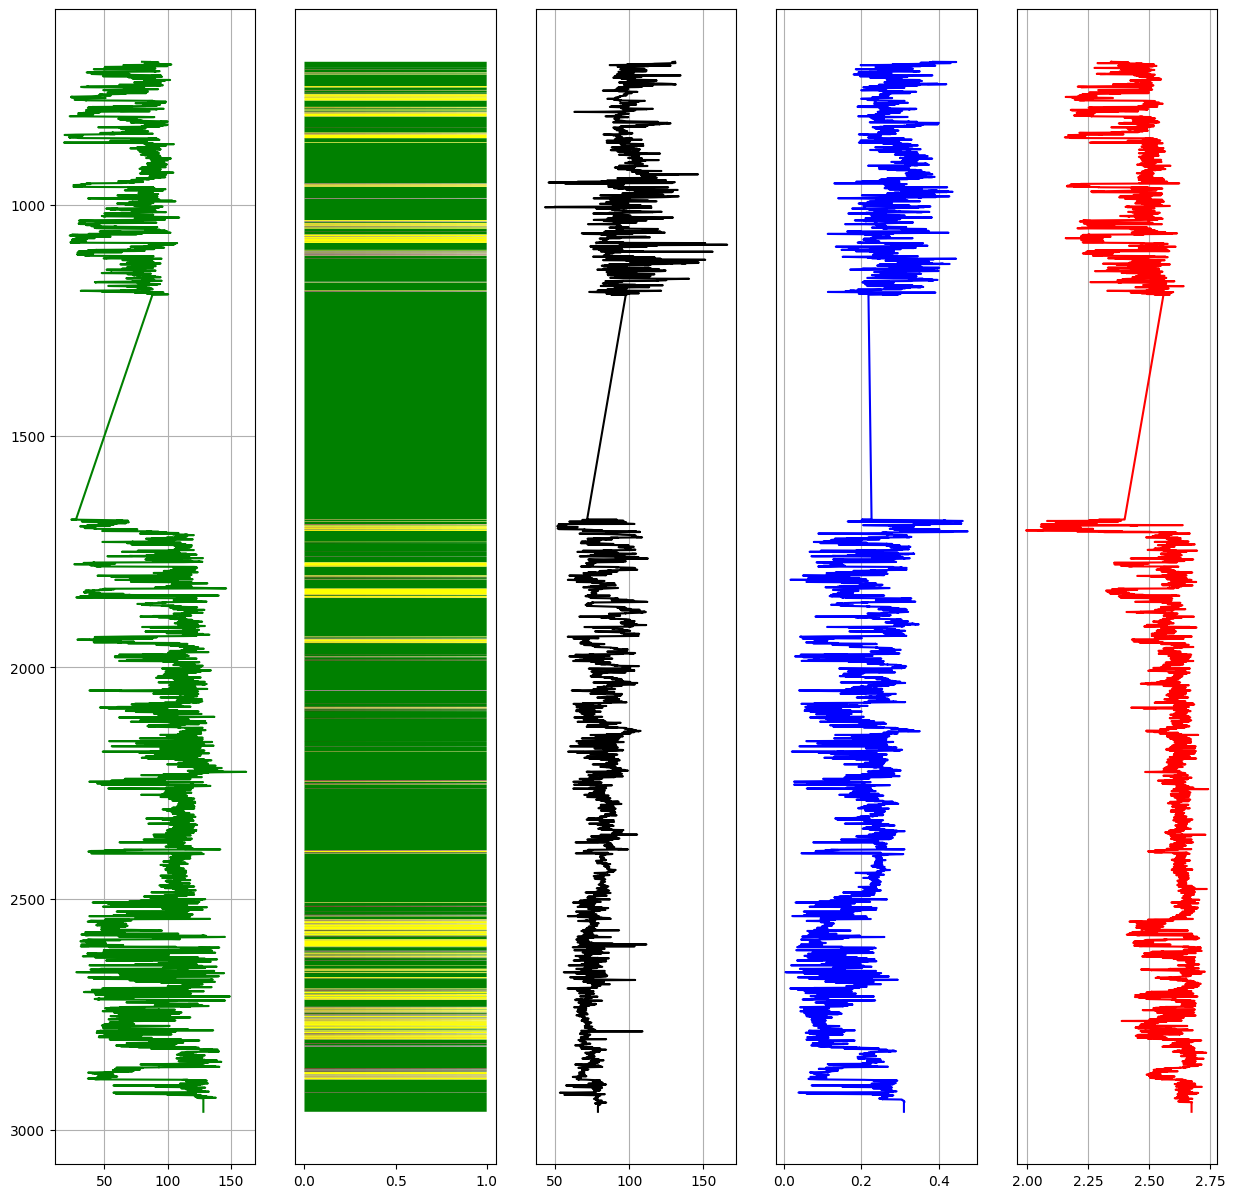

In [7]:
view_caruacu(data_38)
# 2500

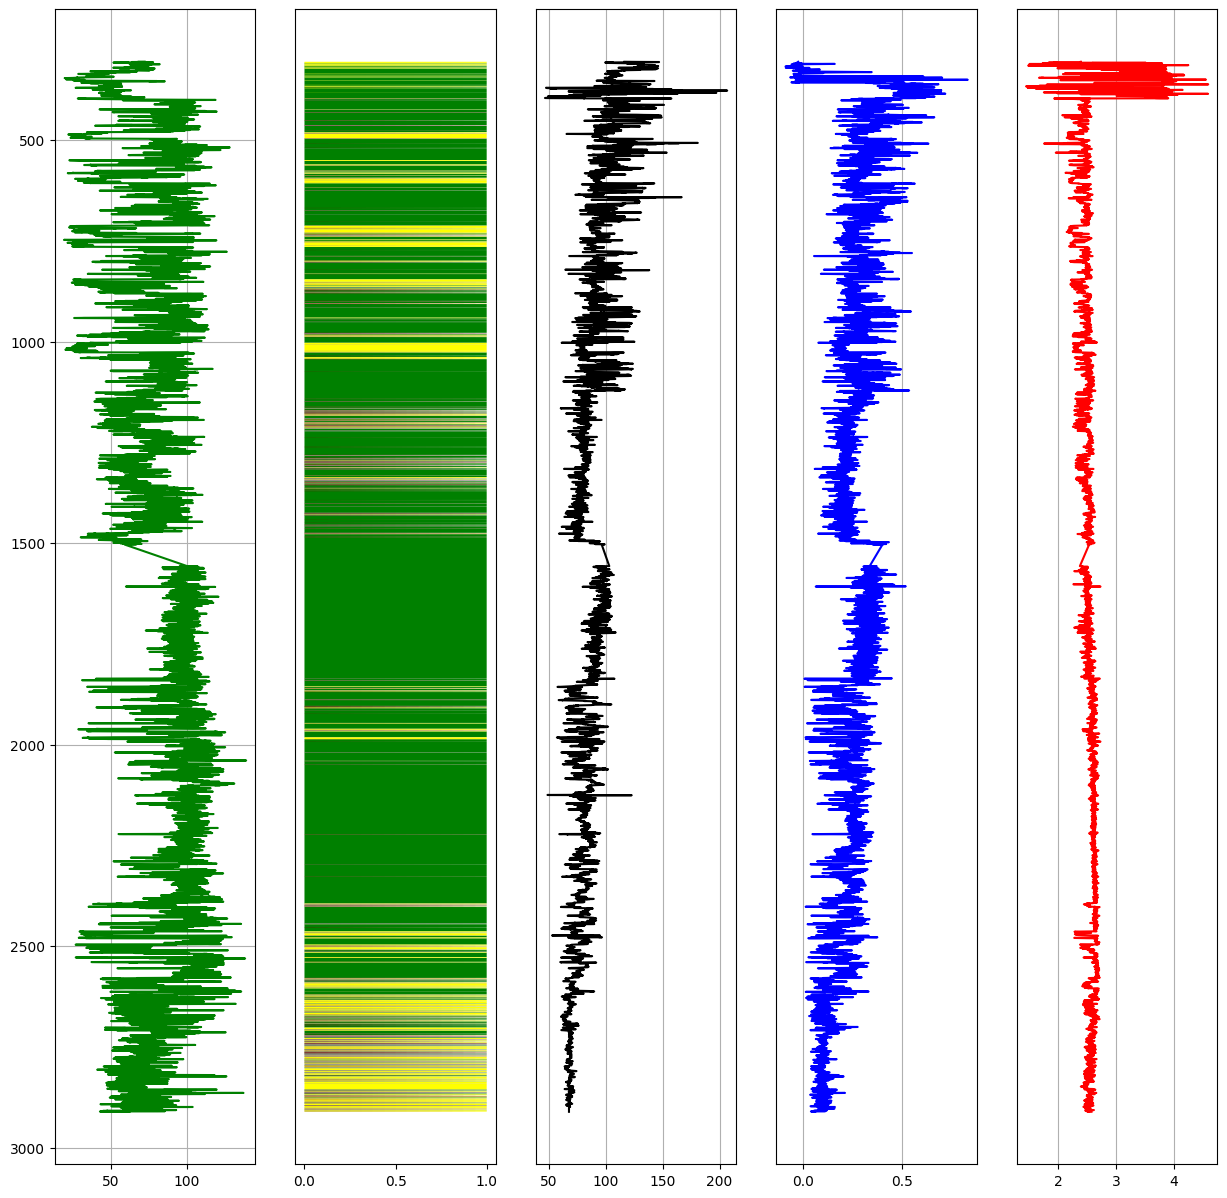

In [8]:
view_caruacu(data_49)
# 1100, 2400

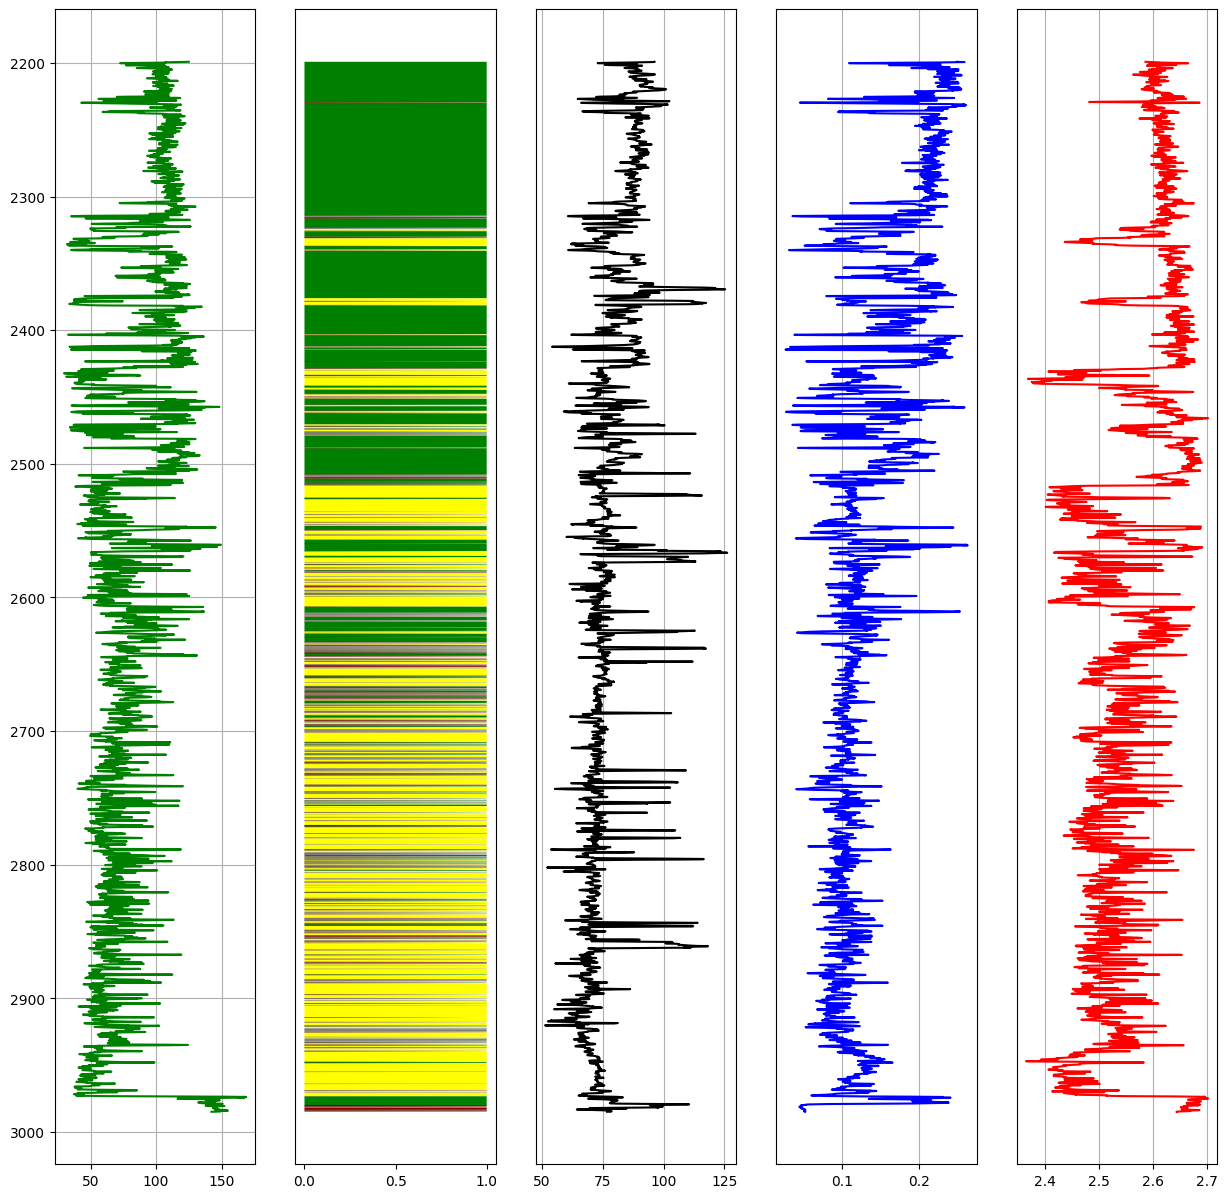

In [9]:
view_caruacu(data_50)
# 2400,2500 

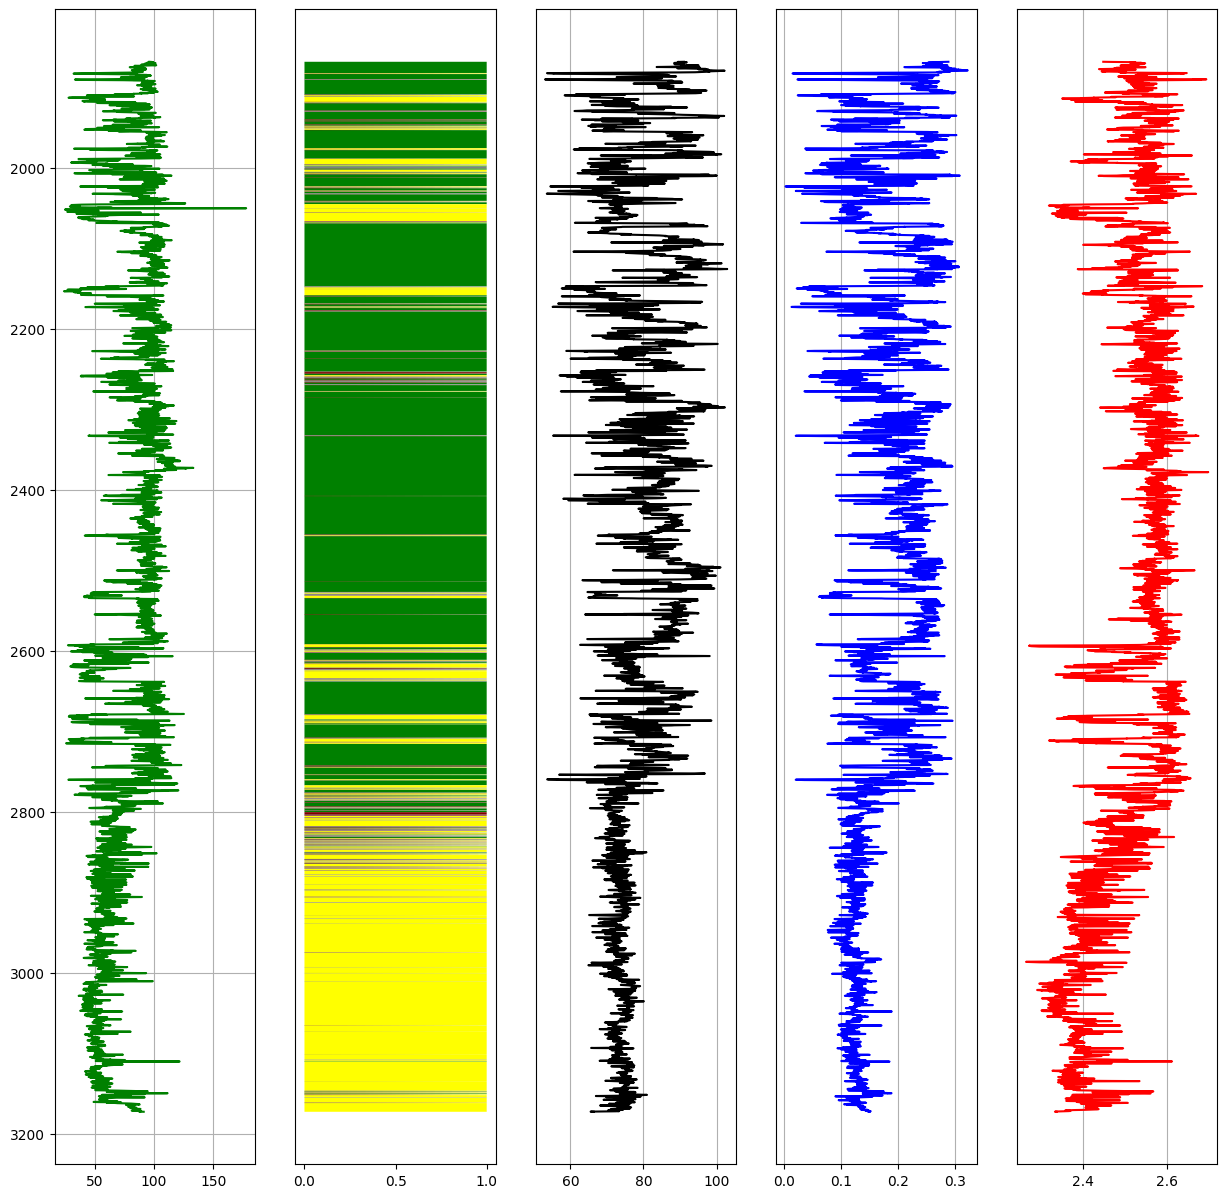

In [10]:
view_caruacu(data_56)
# 2200, 2600, 2800

In [11]:
zones22 = depth_zones(data_22,'DEPTH',[1750, 2600])
zones33 = depth_zones(data_33,'DEPTH',[1100, 2600])
zones38 = depth_zones(data_38,'DEPTH',[2500])
zones49 = depth_zones(data_49,'DEPTH',[1100, 2400])
zones50 = depth_zones(data_50,'DEPTH',[2400,2500])
zones56 = depth_zones(data_56,'DEPTH',[2200, 2600, 2800])

In [12]:
zone1 = [zones22[0], zones33[1], zones49[1], zones56[1]]
df_z1 = pd.concat(zone1)

zone2 = [zones22[1], zones33[0], zones38[0], zones49[0], zones50[0], zones56[0], zones56[2]]
df_z2 = pd.concat(zone2)

zone3 = [zones22[2], zones33[2], zones38[1], zones49[2], zones50[2], zones56[3]]
df_z3 = pd.concat(zone3)

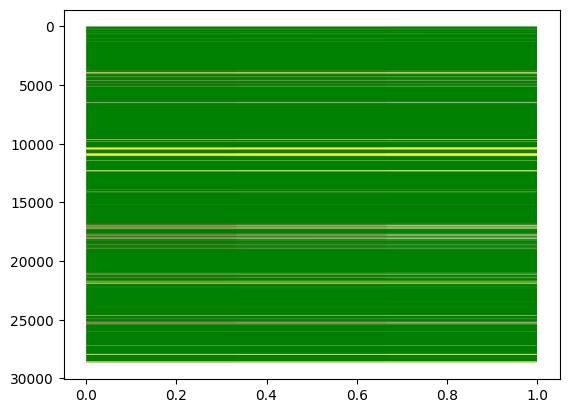

In [13]:
lz1 = np.array(df_z1['Lith_new'])
ldp = np.linspace(0,len(lz1),len(lz1))
plito(lz1,ldp,colors)
plt.gca().invert_yaxis()

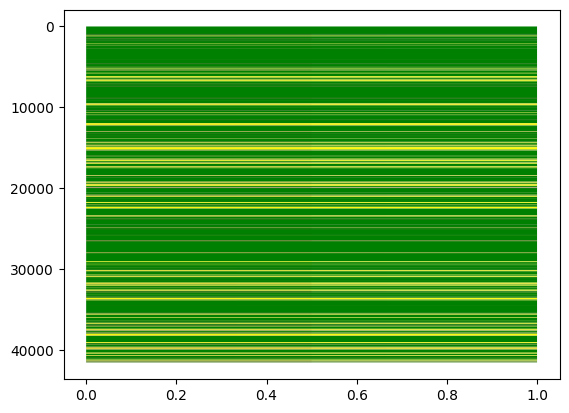

In [14]:
lz2 = np.array(df_z2['Lith_new'])
ldp = np.linspace(0,len(lz2),len(lz2))
plito(lz2,ldp,colors)
plt.gca().invert_yaxis()

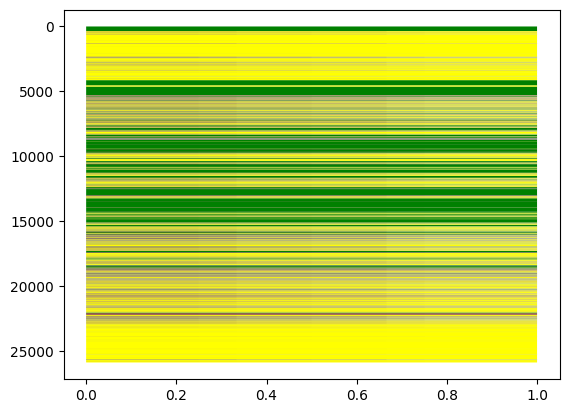

In [15]:
lz3 = np.array(df_z3['Lith_new'])
ldp = np.linspace(0,len(lz3),len(lz3))
plito(lz3,ldp,colors)
plt.gca().invert_yaxis()

## Zone 1

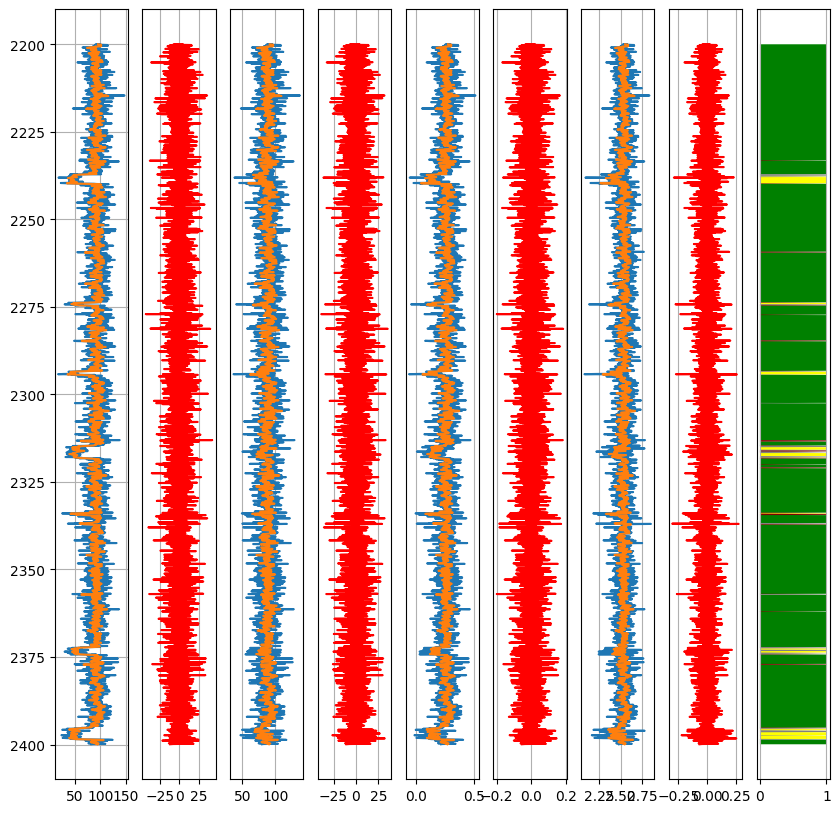

In [16]:
#depth1 = np.arange(2200,2400,np.array(df_z1["DEPTH"])[1] - np.array(df_z1["DEPTH"])[0])
depth1 = np.arange(2200,2400 - 0.07,0.07)

M,st = lithology_generator.markov_chain(np.array(lz1))

lito_s1 = lithology_generator.simple(markov_chain=M,sampling=len(depth1),lithology_code=st,initial_state=57)

stats_gr = pseudo_tools.log_statstics(np.array(df_z1["GR"]),np.array(df_z1["Lith_new"]))
stats_dt = pseudo_tools.log_statstics(np.array(df_z1["DT"]),np.array(df_z1["Lith_new"]))
stats_nphi = pseudo_tools.log_statstics(np.array(df_z1["NPHI"]),np.array(df_z1["Lith_new"]))
stats_rhob = pseudo_tools.log_statstics(np.array(df_z1["RHOB"]),np.array(df_z1["Lith_new"]))

S_GR1 = pseudo_tools.synthetic_log(stats_gr, lithology = lito_s1, seed=42)
S_DT1 = pseudo_tools.synthetic_log(stats_dt, lithology = lito_s1, seed=42)
S_NPHI1 = pseudo_tools.synthetic_log(stats_nphi, lithology = lito_s1, seed=42)
S_RHOB1 = pseudo_tools.synthetic_log(stats_rhob, lithology = lito_s1, seed=42)

GR_smooth = pseudo_tools.moving_average(S_GR1, step = 5)
DT_smooth = pseudo_tools.moving_average(S_DT1, step = 5)
NPHI_smooth = pseudo_tools.moving_average(S_NPHI1, step = 5)
RHOB_smooth = pseudo_tools.moving_average(S_RHOB1, step = 5)

dif_GR = S_GR1 - GR_smooth
dif_DT = S_DT1 - DT_smooth
dif_NPHI = S_NPHI1 - NPHI_smooth
dif_RHOB = S_RHOB1 - RHOB_smooth

plt.figure(figsize=(10,10))

plt.subplot(1,9,1)
plt.gca().invert_yaxis()
plt.plot(S_GR1,depth1)
plt.plot(GR_smooth,depth1)
plt.grid()

plt.subplot(1,9,2)
plt.gca().invert_yaxis()
plt.plot(dif_GR,depth1,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,3)
plt.gca().invert_yaxis()
plt.plot(S_DT1,depth1)
plt.plot(DT_smooth,depth1)
plt.yticks([])
plt.grid()

plt.subplot(1,9,4)
plt.gca().invert_yaxis()
plt.plot(dif_DT,depth1,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,5)
plt.gca().invert_yaxis()
plt.plot(S_NPHI1,depth1)
plt.plot(NPHI_smooth,depth1)
plt.yticks([])
plt.grid()

plt.subplot(1,9,6)
plt.gca().invert_yaxis()
plt.plot(dif_NPHI,depth1,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,7)
plt.gca().invert_yaxis()
plt.plot(S_RHOB1,depth1)
plt.plot(RHOB_smooth,depth1)
plt.yticks([])
plt.grid()

plt.subplot(1,9,8)
plt.gca().invert_yaxis()
plt.plot(dif_RHOB,depth1,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,9)
plt.gca().invert_yaxis()
plito(lito_s1,depth1,colors)
plt.yticks([])
plt.grid()
plt.show()

## Zone 2

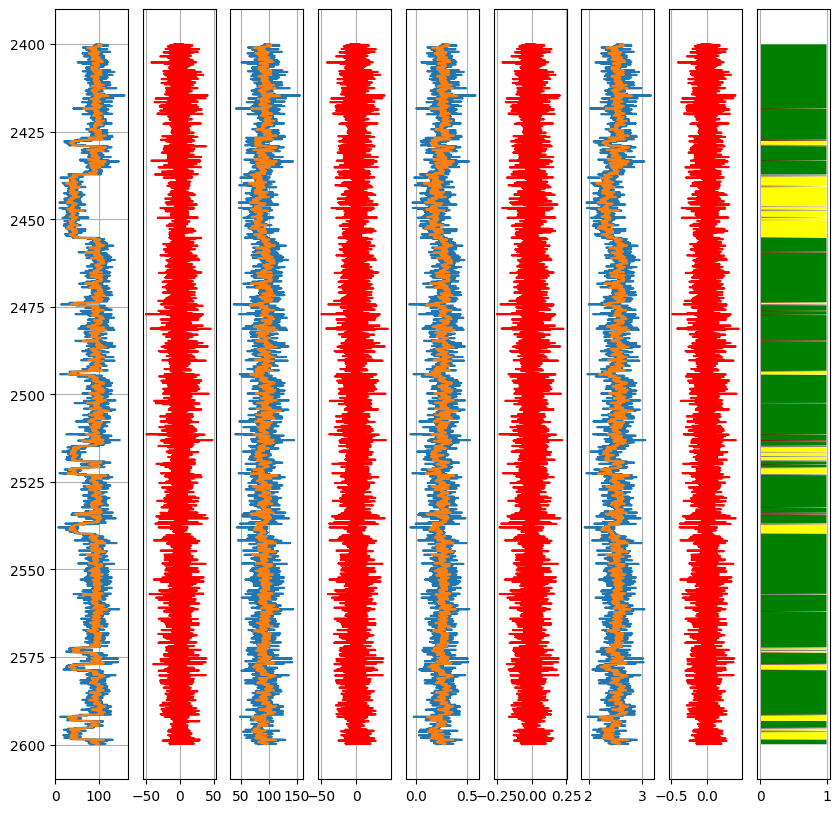

In [17]:
#depth2 = np.arange(2400,2600,np.array(df_z2["DEPTH"])[1] - np.array(df_z2["DEPTH"])[0])
depth2 = np.arange(2400,2600 - 0.07,0.07)

M,st = lithology_generator.markov_chain(np.array(lz2))

lito_s2 = lithology_generator.simple(markov_chain=M,sampling=len(depth2),lithology_code=st,initial_state=57)

stats_gr = pseudo_tools.log_statstics(np.array(df_z2["GR"]),np.array(df_z2["Lith_new"]))
stats_dt = pseudo_tools.log_statstics(np.array(df_z2["DT"]),np.array(df_z2["Lith_new"]))
stats_nphi = pseudo_tools.log_statstics(np.array(df_z2["NPHI"]),np.array(df_z2["Lith_new"]))
stats_rhob = pseudo_tools.log_statstics(np.array(df_z2["RHOB"]),np.array(df_z2["Lith_new"]))

S_GR2 = pseudo_tools.synthetic_log(stats_gr, lithology = lito_s2, seed=42)
S_DT2 = pseudo_tools.synthetic_log(stats_dt, lithology = lito_s2, seed=42)
S_NPHI2 = pseudo_tools.synthetic_log(stats_nphi, lithology = lito_s2, seed=42)
S_RHOB2 = pseudo_tools.synthetic_log(stats_rhob, lithology = lito_s2, seed=42)

GR_smooth = pseudo_tools.moving_average(S_GR2, step = 5)
DT_smooth = pseudo_tools.moving_average(S_DT2, step = 5)
NPHI_smooth = pseudo_tools.moving_average(S_NPHI2, step = 5)
RHOB_smooth = pseudo_tools.moving_average(S_RHOB2, step = 5)

dif_GR = S_GR2 - GR_smooth
dif_DT = S_DT2 - DT_smooth
dif_NPHI = S_NPHI2 - NPHI_smooth
dif_RHOB = S_RHOB2 - RHOB_smooth

plt.figure(figsize=(10,10))

plt.subplot(1,9,1)
plt.gca().invert_yaxis()
plt.plot(S_GR2,depth2)
plt.plot(GR_smooth,depth2)
plt.grid()

plt.subplot(1,9,2)
plt.gca().invert_yaxis()
plt.plot(dif_GR,depth2,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,3)
plt.gca().invert_yaxis()
plt.plot(S_DT2,depth2)
plt.plot(DT_smooth,depth2)
plt.yticks([])
plt.grid()

plt.subplot(1,9,4)
plt.gca().invert_yaxis()
plt.plot(dif_DT,depth2,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,5)
plt.gca().invert_yaxis()
plt.plot(S_NPHI2,depth2)
plt.plot(NPHI_smooth,depth2)
plt.yticks([])
plt.grid()

plt.subplot(1,9,6)
plt.gca().invert_yaxis()
plt.plot(dif_NPHI,depth2,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,7)
plt.gca().invert_yaxis()
plt.plot(S_RHOB2,depth2)
plt.plot(RHOB_smooth,depth2)
plt.yticks([])
plt.grid()

plt.subplot(1,9,8)
plt.gca().invert_yaxis()
plt.plot(dif_RHOB,depth2,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,9)
plt.gca().invert_yaxis()
plito(lito_s2,depth2,colors)
plt.yticks([])
plt.grid()
plt.show()

## zone 3

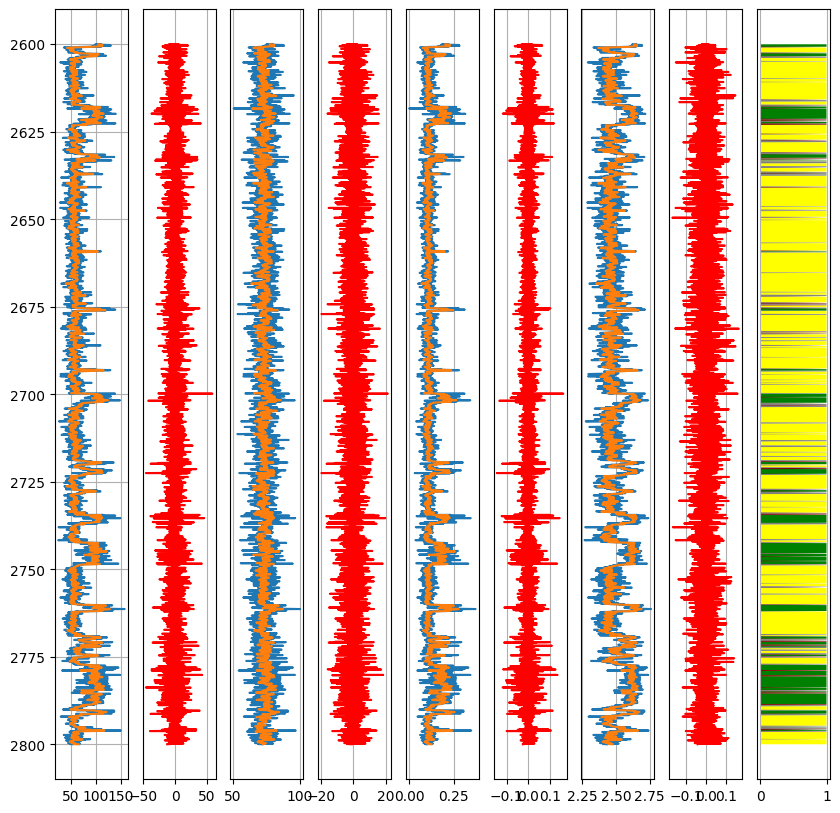

In [18]:
#depth3 = np.arange(2600,2800,np.array(df_z3["DEPTH"])[1] - np.array(df_z3["DEPTH"])[0])
depth3 = np.arange(2600,2800,0.07)

M,st = lithology_generator.markov_chain(np.array(lz3))

lito_s3 = lithology_generator.simple(markov_chain=M,sampling=len(depth3),lithology_code=st,initial_state=57)

stats_gr = pseudo_tools.log_statstics(np.array(df_z3["GR"]),np.array(df_z3["Lith_new"]))
stats_dt = pseudo_tools.log_statstics(np.array(df_z3["DT"]),np.array(df_z3["Lith_new"]))
stats_nphi = pseudo_tools.log_statstics(np.array(df_z3["NPHI"]),np.array(df_z3["Lith_new"]))
stats_rhob = pseudo_tools.log_statstics(np.array(df_z3["RHOB"]),np.array(df_z3["Lith_new"]))

S_GR3 = pseudo_tools.synthetic_log(stats_gr, lithology = lito_s3, seed=42)
S_DT3 = pseudo_tools.synthetic_log(stats_dt, lithology = lito_s3, seed=42)
S_NPHI3 = pseudo_tools.synthetic_log(stats_nphi, lithology = lito_s3, seed=42)
S_RHOB3 = pseudo_tools.synthetic_log(stats_rhob, lithology = lito_s3, seed=42)

GR_smooth = pseudo_tools.moving_average(S_GR3, step = 5)
DT_smooth = pseudo_tools.moving_average(S_DT3, step = 5)
NPHI_smooth = pseudo_tools.moving_average(S_NPHI3, step = 5)
RHOB_smooth = pseudo_tools.moving_average(S_RHOB3, step = 5)

dif_GR = S_GR3 - GR_smooth
dif_DT = S_DT3 - DT_smooth
dif_NPHI = S_NPHI3 - NPHI_smooth
dif_RHOB = S_RHOB3 - RHOB_smooth

plt.figure(figsize=(10,10))

plt.subplot(1,9,1)
plt.gca().invert_yaxis()
plt.plot(S_GR3,depth3)
plt.plot(GR_smooth,depth3)
plt.grid()

plt.subplot(1,9,2)
plt.gca().invert_yaxis()
plt.plot(dif_GR,depth3,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,3)
plt.gca().invert_yaxis()
plt.plot(S_DT3,depth3)
plt.plot(DT_smooth,depth3)
plt.yticks([])
plt.grid()

plt.subplot(1,9,4)
plt.gca().invert_yaxis()
plt.plot(dif_DT,depth3,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,5)
plt.gca().invert_yaxis()
plt.plot(S_NPHI3,depth3)
plt.plot(NPHI_smooth,depth3)
plt.yticks([])
plt.grid()

plt.subplot(1,9,6)
plt.gca().invert_yaxis()
plt.plot(dif_NPHI,depth3,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,7)
plt.gca().invert_yaxis()
plt.plot(S_RHOB3,depth3)
plt.plot(RHOB_smooth,depth3)
plt.yticks([])
plt.grid()

plt.subplot(1,9,8)
plt.gca().invert_yaxis()
plt.plot(dif_RHOB,depth3,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,9)
plt.gca().invert_yaxis()
plito(lito_s3,depth3,colors)
plt.yticks([])
plt.grid()
plt.show()

## Adding noise

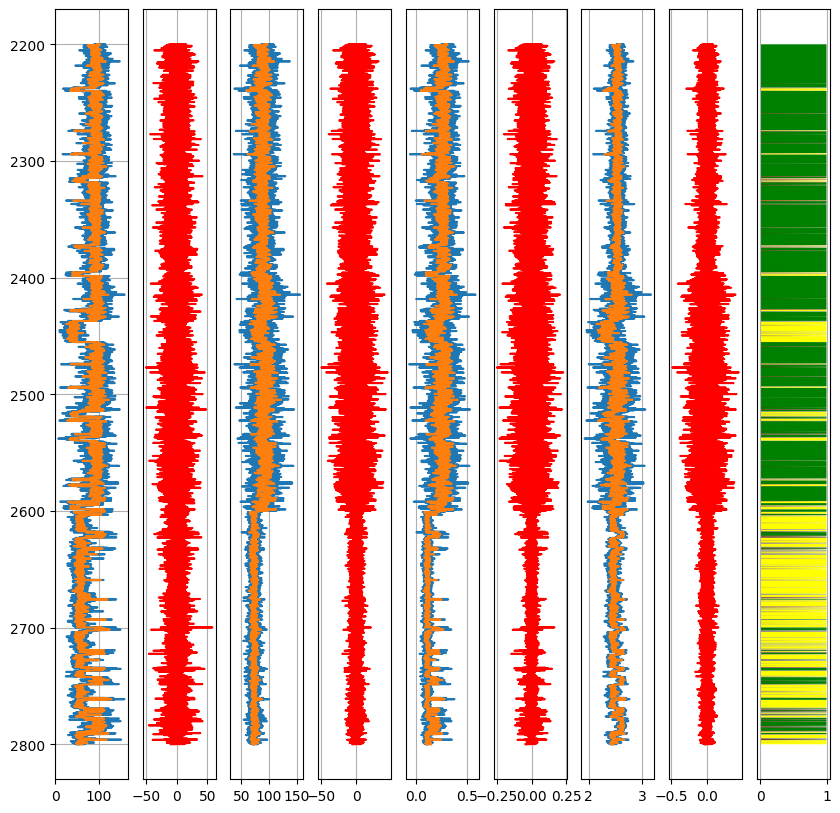

In [19]:
S_LITO = np.array(list(lito_s1) + list(lito_s2) + list(lito_s3))
S_DEPTH = np.array(list(depth1) + list(depth2) + list(depth3))
S_GR = np.array(list(S_GR1) + list(S_GR2) + list(S_GR3))
S_DT = np.array(list(S_DT1) + list(S_DT2) + list(S_DT3))
S_NPHI = np.array(list(S_NPHI1) + list(S_NPHI2) + list(S_NPHI3))
S_RHOB = np.array(list(S_RHOB1) + list(S_RHOB2) + list(S_RHOB3))

GR_smooth = pseudo_tools.moving_average(S_GR, step = 5)
DT_smooth = pseudo_tools.moving_average(S_DT, step = 5)
NPHI_smooth = pseudo_tools.moving_average(S_NPHI, step = 5)
RHOB_smooth = pseudo_tools.moving_average(S_RHOB, step = 5)

dif_GR = S_GR - GR_smooth
dif_DT = S_DT - DT_smooth
dif_NPHI = S_NPHI - NPHI_smooth
dif_RHOB = S_RHOB - RHOB_smooth

# =============================================================== #

plt.figure(figsize=(10,10))

plt.subplot(1,9,1)
plt.gca().invert_yaxis()
plt.plot(S_GR,S_DEPTH)
plt.plot(GR_smooth,S_DEPTH)
plt.grid()

plt.subplot(1,9,2)
plt.gca().invert_yaxis()
plt.plot(dif_GR,S_DEPTH,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,3)
plt.gca().invert_yaxis()
plt.plot(S_DT,S_DEPTH)
plt.plot(DT_smooth,S_DEPTH)
plt.yticks([])
plt.grid()

plt.subplot(1,9,4)
plt.gca().invert_yaxis()
plt.plot(dif_DT,S_DEPTH,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,5)
plt.gca().invert_yaxis()
plt.plot(S_NPHI,S_DEPTH)
plt.plot(NPHI_smooth,S_DEPTH)
plt.yticks([])
plt.grid()

plt.subplot(1,9,6)
plt.gca().invert_yaxis()
plt.plot(dif_NPHI,S_DEPTH,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,7)
plt.gca().invert_yaxis()
plt.plot(S_RHOB,S_DEPTH)
plt.plot(RHOB_smooth,S_DEPTH)
plt.yticks([])
plt.grid()

plt.subplot(1,9,8)
plt.gca().invert_yaxis()
plt.plot(dif_RHOB,S_DEPTH,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,9,9)
plt.gca().invert_yaxis()
plito(S_LITO,S_DEPTH,colors)
plt.yticks([])
plt.grid()
plt.show()

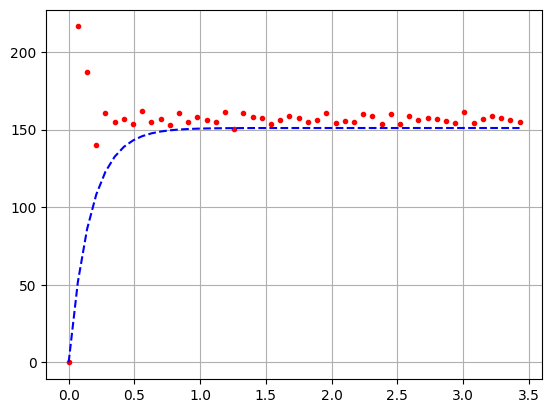

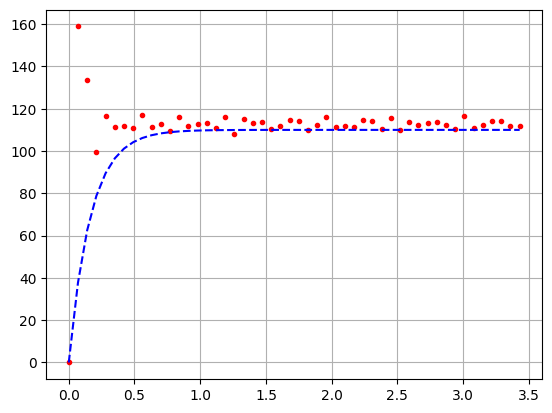

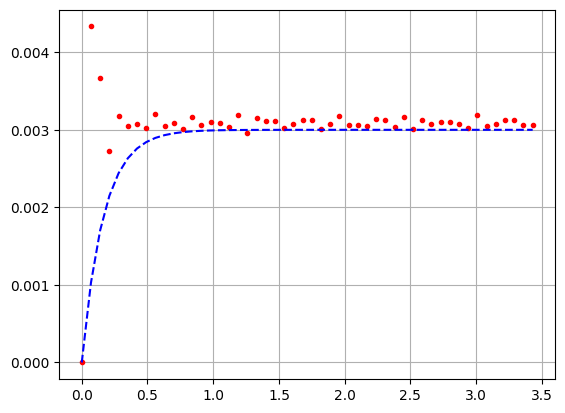

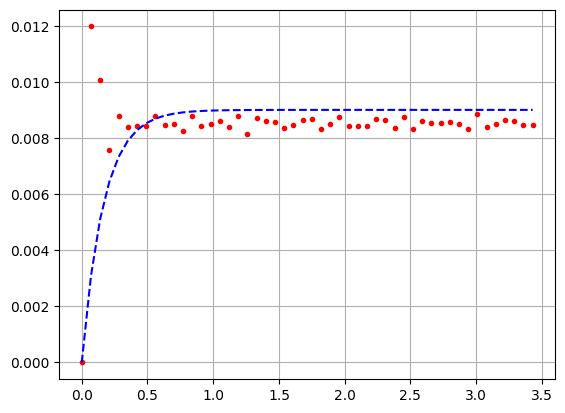

In [20]:
gm_gr,dt_gr = pseudo_tools.gamma_calc(dif_GR,S_DEPTH,step=50)
gm_dt,dt_dt = pseudo_tools.gamma_calc(dif_DT,S_DEPTH,step=50)
gm_nphi,dt_nphi = pseudo_tools.gamma_calc(dif_NPHI,S_DEPTH,step=50)
gm_rhob,dt_rhob = pseudo_tools.gamma_calc(dif_RHOB,S_DEPTH,step=50)

var_gr = monte_carlo_simulations.exponential_variogram_model(distance = dt_gr, correlation_length =0.5, sill=151)
var_dt = monte_carlo_simulations.exponential_variogram_model(distance = dt_dt, correlation_length =0.5, sill=110)
var_nphi = monte_carlo_simulations.exponential_variogram_model(distance = dt_nphi, correlation_length =0.5, sill=0.003)
var_rhob = monte_carlo_simulations.exponential_variogram_model(distance = dt_rhob, correlation_length =0.5, sill=0.009)

C_gr = pseudo_tools.adjustment(S_DEPTH,0.9,151)
C_dt = pseudo_tools.adjustment(S_DEPTH,0.9,110)
C_nphi = pseudo_tools.adjustment(S_DEPTH,0.9,0.003)
C_rhob = pseudo_tools.adjustment(S_DEPTH,0.9,0.009)

plt.plot(dt_gr,gm_gr,'r.')
plt.plot(dt_gr,var_gr,'b--')
plt.grid()
plt.show()

plt.plot(dt_dt,gm_dt,'r.')
plt.plot(dt_dt,var_dt,'b--')
plt.grid()
plt.show()

plt.plot(dt_nphi,gm_nphi,'r.')
plt.plot(dt_nphi,var_nphi,'b--')
plt.grid()
plt.show()

plt.plot(dt_rhob,gm_rhob,'r.')
plt.plot(dt_rhob,var_rhob,'b--')
plt.grid()
plt.show()

In [21]:
S = pseudo_tools.cov_matrix(np.array([S_NPHI,S_RHOB]))

#K_gr = np.kron(S,C_gr)
#K_dt = np.kron(S,C_dt)
K_nphi = np.kron(S,C_nphi)
K_rhob = np.kron(S,C_rhob)

#R_gr = np.linalg.cholesky(K_gr)
#R_dt = np.linalg.cholesky(K_dt)
R_nphi = np.linalg.cholesky(K_nphi)
R_rhob = np.linalg.cholesky(K_rhob)


NameError: name 'R_dt' is not defined

In [22]:
u = np.random.normal(0.0,1.0,np.shape(R_nphi)[0])
Ru = np.dot(R_nphi,u)
#Ru_gr,Ru_dt,Ru_nphi,Ru_rhob = np.split(Ru,np.shape(S)[0])
Ru_nphi,Ru_rhob = np.split(Ru,np.shape(S)[0])

#S_GR_final1 = GR_smooth + Ru_gr
#S_DT_final = DT_smooth + Ru_dt
S_NPHI_final = NPHI_smooth + Ru_nphi
S_RHOB_final = RHOB_smooth + Ru_rhob

In [26]:
C_gr = pseudo_tools.adjustment(S_DEPTH,0.9,151)
C_gr = np.array(C_gr)
R_gr = np.linalg.cholesky(C_gr)
u = np.random.normal(0.0,1.0,len(GR_smooth))
Ru_gr = np.dot(R_gr,u)
S_GR_final = GR_smooth + Ru_gr

In [28]:
C_dt = pseudo_tools.adjustment(S_DEPTH,0.9,110)
C_dt = np.array(C_dt)
R_dt = np.linalg.cholesky(C_dt)
u = np.random.normal(0.0,1.0,len(DT_smooth))
Ru_dt = np.dot(R_dt,u)
S_DT_final = DT_smooth + Ru_dt

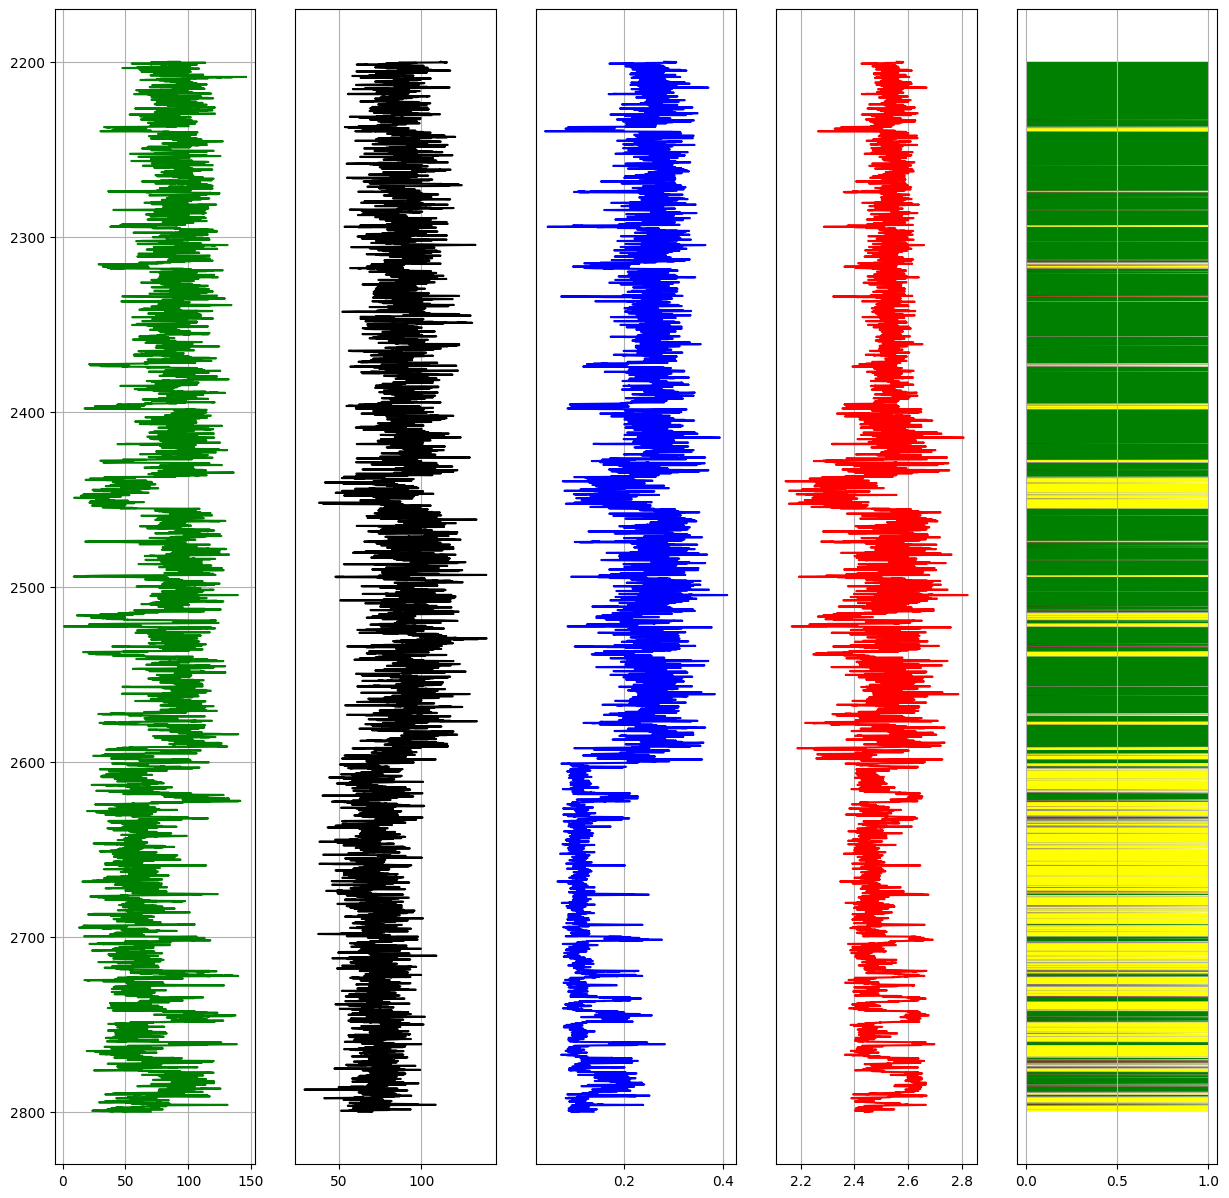

In [31]:
plt.figure(figsize=(15,15))

plt.subplot(1,5,1)
plt.gca().invert_yaxis()
plt.plot(S_GR_final,S_DEPTH,'g')
plt.grid()

plt.subplot(1,5,2)
plt.gca().invert_yaxis()
plt.plot(S_DT_final,S_DEPTH,'k')
plt.yticks([])
plt.grid()

plt.subplot(1,5,3)
plt.gca().invert_yaxis()
plt.plot(S_NPHI_final,S_DEPTH,'b')
plt.yticks([])
plt.grid()

plt.subplot(1,5,4)
plt.gca().invert_yaxis()
plt.plot(S_RHOB_final,S_DEPTH,'r')
plt.yticks([])
plt.grid()

plt.subplot(1,5,5)
plt.gca().invert_yaxis()
plito(S_LITO,S_DEPTH,colors)
plt.yticks([])
plt.grid()